# Test: Images in DataFrames

In [1]:
import pandas


In [2]:
import PIL

In [3]:
import numpy

In [4]:
from PIL import Image

In [5]:
poster_dir = "../data/01_raw/posters"

In [6]:
example_image = "12xDYuYhDqvB5XUdMoJCLHY5dy2.jpg"

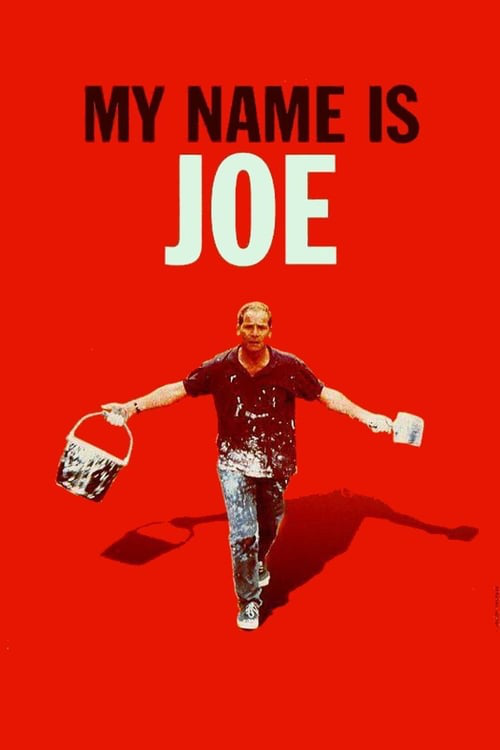

In [7]:
Image.open(f"{poster_dir}/{example_image}")

In [8]:
movies = catalog.load("movies")

2021-03-15 10:58:35,990 - kedro.io.data_catalog - INFO - Loading data from `movies` (ParquetDataSet)...


In [9]:
movies = movies.sample(frac=1)

In [10]:
movies

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,status,tagline,title,video,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path
4744,False,/vZUntwE0BLPxvjDVi54qQqxYyOI.jpg,NaN,6000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 35, 'n...",,9534,tt0395125,es,Crimen Ferpecto,...,Released,,The Ferpect Crime,False,6.6,203,NaN,None,None,None
3032,False,/4TERVFInENnpSW1pJcjfdzKjMYW.jpg,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",,5424,tt0082479,it,Antropophagus,...,Released,It's not fear that tears you apart...it's him!,Antropophagus,False,5.5,94,NaN,None,None,None
2632,False,/gh9JrOkJSY48dreq3EROd0HEsly.jpg,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",,4544,tt0046954,de,Emil und die Detektive,...,Released,,Emil and the Detectives,False,6.3,5,NaN,None,None,None
4799,False,/ApgpEdgtU9Y55mehnR9TV9wPyHd.jpg,NaN,1200000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",,9592,tt0470055,en,Open Water 2: Adrift,...,Released,Fatigue. Hypothermia. Death.,Open Water 2: Adrift,False,5.5,489,86113.0,Open Water Collection,/8EAzWZ2V6huHqRvUFZ815ar8xAc.jpg,/2vc1MmKa9vMPQerdwLa3fZVhBOS.jpg
4685,False,/oRJDlTmdYToqJotGsehhdfejVy.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,9465,tt0126250,en,Cookie's Fortune,...,Released,"Welcome to Holly Springs... home of murder, ma...",Cookie's Fortune,False,6.5,109,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,False,None,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",,5799,tt0495692,en,Famous T & A,...,Released,Seductive Celebrity Skins Bared Beyond Belief!,Famous T & A,True,7.7,3,NaN,None,None,None
2127,False,None,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",None,3287,tt0224299,en,It's Alive: The True Story of Frankenstein,...,Released,,It's Alive: The True Story of Frankenstein,False,7.0,2,NaN,None,None,None
3487,False,None,NaN,0,"[{'id': 18, 'name': 'Drama'}]",,6209,tt1122873,en,Späte Aussicht,...,Released,,Späte Aussicht,False,7.0,1,NaN,None,None,None
1100,False,None,NaN,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 18,...",,1658,tt0466634,de,"2 oder 3 Dinge, die ich von ihm weiß",...,Released,,2 or 3 Things I Know About Him,False,6.8,4,NaN,None,None,None


In [11]:
movies.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'belongs_to_collection.id',
       'belongs_to_collection.name', 'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path'],
      dtype='object')

In [12]:
def load_poster(poster_path):
    if poster_path is None:
        return None
    with Image.open(f"{poster_dir}/{poster_path}") as image:
        return numpy.asarray(image)

In [13]:
movies["poster"] = movies["poster_path"].apply(load_poster)

In [14]:
movies["poster"]

4744    [[[211, 211, 211], [213, 213, 213], [215, 215,...
3032    [[[89, 91, 90], [89, 91, 90], [89, 91, 90], [8...
2632    [[[254, 224, 126], [254, 224, 126], [254, 224,...
4799    [[[28, 87, 129], [52, 113, 157], [62, 124, 171...
4685    [[[190, 33, 26], [180, 33, 23], [175, 33, 21],...
                              ...                        
3245    [[[19, 37, 57], [22, 40, 60], [21, 39, 59], [1...
2127    [[[80, 60, 88], [81, 61, 89], [82, 62, 90], [8...
3487                                                 None
1100    [[[142, 190, 174], [141, 189, 173], [139, 187,...
610     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Name: poster, Length: 5141, dtype: object

In [15]:
movies["poster"]

4744    [[[211, 211, 211], [213, 213, 213], [215, 215,...
3032    [[[89, 91, 90], [89, 91, 90], [89, 91, 90], [8...
2632    [[[254, 224, 126], [254, 224, 126], [254, 224,...
4799    [[[28, 87, 129], [52, 113, 157], [62, 124, 171...
4685    [[[190, 33, 26], [180, 33, 23], [175, 33, 21],...
                              ...                        
3245    [[[19, 37, 57], [22, 40, 60], [21, 39, 59], [1...
2127    [[[80, 60, 88], [81, 61, 89], [82, 62, 90], [8...
3487                                                 None
1100    [[[142, 190, 174], [141, 189, 173], [139, 187,...
610     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Name: poster, Length: 5141, dtype: object

In [16]:
def resize_image(img_a, factor):
    if img_a is None:
        return None
    img = Image.fromarray(numpy.uint8(img_a))
    img_resized = img.resize((numpy.array(img.size) * factor).astype(int))
    return numpy.asarray(img_resized)

In [17]:
%%time
movies["poster_thumbnail"] = movies["poster"].apply(resize_image, factor=0.25)

CPU times: user 38.5 s, sys: 6.83 s, total: 45.3 s
Wall time: 49 s


In [18]:
movies["poster_thumbnail"]

4744    [[[205, 205, 205], [217, 217, 217], [232, 232,...
3032    [[[89, 92, 90], [89, 90, 90], [89, 88, 89], [8...
2632    [[[254, 224, 126], [254, 224, 126], [254, 224,...
4799    [[[50, 109, 156], [50, 112, 161], [52, 112, 15...
4685    [[[182, 33, 24], [185, 32, 27], [184, 32, 24],...
                              ...                        
3245    [[[19, 38, 59], [18, 39, 59], [14, 36, 59], [1...
2127    [[[82, 62, 90], [84, 65, 93], [81, 60, 92], [8...
3487                                                 None
1100    [[[146, 194, 178], [148, 196, 180], [149, 197,...
610     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Name: poster_thumbnail, Length: 5141, dtype: object

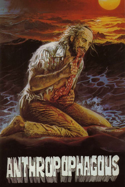

In [19]:
Image.fromarray(movies["poster_thumbnail"].iloc[1])

## To Parquet